# TD 5 : Le traitement de textes en Python

Dans ce TD, vous allez commencer par faire du traitement de textes simple avec Python. Mais avant de commencer, vous allez devoir installer quelques bibliothèques. Lancez les cellules suivantes : 

In [ ]:
!pip install nltk
!pip install matplotlib

Tout est installé ! Maintenant il suffit d'importer les bibliothèques pour pouvoir les utiliser. On va également télécharger quelques modules de NLTK qui nous seront utiles : 

In [ ]:
import matplotlib.pyplot as plt
import nltk
import re
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

## Exercice 1 : Initiation au traitement de texte avec NLTK

Lancez la cellule ci-dessous. 

Les fonctions `split()` et `nltk.word_tokenize()` découpent un texte en mots. Cependant, la fonction `split()` découpe au niveau des espaces, on a donc un découpage de mots plus approximatif si des ponctuations sont collées à des mots, comme ici "toutes;" et "façon.". 

`nltk.word_tokenize()` est plus précis puisqu'il sépare les ponctuations des mots.

In [ ]:
exemple = "Les familles heureuses se ressemblent toutes; les familles malheureuses sont malheureuses chacune à leur façon."

mots = exemple.split()
tokens = nltk.word_tokenize(exemple)

print(mots)
print(tokens)

### Pré-traitements :

Avant le découpage en mots, on va toutefois appliquer les deux pré-traitements de base : 
- Supprimer les ponctuations 
- Supprimer les majuscules

Complétez le code suivant :

In [1]:
exemple = "Les familles heureuses se ressemblent toutes; les familles malheureuses sont malheureuses chacune à leur façon."

# On met le texte en minuscules
exemple = exemple.lower()
print(exemple)

# On supprime les ponctuations

ponctuations = ".;!"       #Mettre les ponctuations que vous souhaitez supprimer
for ponct in ponctuations :
    exemple = exemple.replace(ponct, "")

print(exemple)

les familles heureuses se ressemblent toutes; les familles malheureuses sont malheureuses chacune à leur façon.
les familles heureuses se ressemblent toutes les familles malheureuses sont malheureuses chacune à leur façon


Dans la bibliothèque `string`, une liste de ponctuations est fournie. Ça nous évite d'initialiser toutes les ponctuations manuellement. 

In [ ]:
print(string.punctuation)

**Attention** ! C'est pratique mais parfois, on a besoin de certaines ponctuations comme le trait d'union pour les mots de type "peut-être". Si on retire le trait d'union, le mot "peut-être" sera divisé en deux mots au moment du découpage. 

Initialiser à la main permet d'avoir plus de contrôle sur ce qu'on veut retirer.

### Découpage en mots : 

Utilisez une fonction de votre choix pour découper votre texte pré-traité en mots : 

In [3]:
# Écrire votre code ici 

mots_exemple = ... 

### Extraire les occurrences de chaque mot et visualiser sur un graphique

Comme vu en cours, on peut utiliser la fonction `count()`. NLTK permet également de faire cette opération : 

In [ ]:
# On calcule les fréquences (= occurrences) de chaque mots de la liste 
mots_freq_ex = nltk.FreqDist(mots_exemple)

# On extrait les 20 mots les plus fréquents 
mots_plus_freq_ex = mots_freq_ex.most_common(20)
print(mots_plus_freq_ex)

On peut visualiser les fréquences des mots d'un texte avec la fonction `plot()` appliquée sur le résultat de la fonction `nltk.FreqDist(liste_mots)` :

In [ ]:
# 20 correspond au nombre de mots que l'on souhaite sur notre graphique

plt.figure(figsize=(10, 5))           #change la taille de la figure
mots_freq_ex.plot(20, title="20 mots les plus fréquents")

### Supprimer les mots-vides

Extraire les mots les plus fréquents est un bon indicateur du sujet abordé dans un texte. 

On remarque cependant qu'il y a un certain nombre de mots qui ne sont pas porteurs de sens comme "le, la, je, une, se, à, et" mais qui sont très fréquents. On les appelle les **mots-vides** (mots-outils/mots fonctionnels) opposés aux **mots (sémantiquement) pleins**.

Ces mots ne sont pas utiles dans une analyse du thème d'un texte. On va alors ajouter un pré-traitement qui le supprime.

NLTK fournit une liste de mots-vides pour le français :

In [ ]:
motsvides = nltk.corpus.stopwords.words('french')
print(motsvides)

In [4]:
# Ecrivez une fonction permettant de retirer les mots-vids

## Exercice 2 : C'est une bonne situation ça, scribe ?

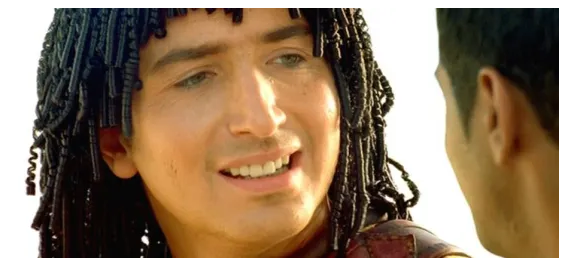

Dans cet exercice, vous allez appliquer les traitements vu en cours sur ce "célèbre" monologue :
- Retirer les ponctuations
- Retirer les majuscules
- Retirer les mots-vides
- Extraire les 30 mots les plus fréquents
- Afficher les 30 mots sur un graphique

In [5]:
texte = "Mais, vous savez, moi je ne crois pas qu'il y ait de bonne ou de mauvaise situation. Moi, si je devais résumer ma vie aujourd'hui avec vous, je dirais que c'est d'abord des rencontres, des gens qui m'ont tendu la main, peut-être à un moment où je ne pouvais pas, où j'étais seul chez moi. Et c'est assez curieux de se dire que les hasards, les rencontres forgent une destinée… Parce que quand on a le goût de la chose, quand on a le goût de la chose bien faite, le beau geste, parfois on ne trouve pas l'interlocuteur en face, je dirais, le miroir qui vous aide à avancer. Alors ce n'est pas mon cas, comme je le disais là, puisque moi au contraire, j'ai pu ; et je dis merci à la vie, je lui dis merci, je chante la vie, je danse la vie… Je ne suis qu'amour ! Et finalement, quand beaucoup de gens aujourd'hui me disent : « Mais comment fais-tu pour avoir cette humanité ? ». Eh bien je leur réponds très simplement, je leur dis que c'est ce goût de l'amour, ce goût donc qui m'a poussé aujourd'hui à entreprendre une construction mécanique, mais demain, qui sait, peut-être simplement à me mettre au service de la communauté, à faire le don, le don de soi…"

### Analyse du texte par phrase :

- Découper le texte en phrases avec la fonction `re.split()`

Pour chaque phrase :
- Afficher chaque phrase
- Afficher sa taille en caractères et en mots

In [6]:
texte = "Mais, vous savez, moi je ne crois pas qu'il y ait de bonne ou de mauvaise situation. Moi, si je devais résumer ma vie aujourd'hui avec vous, je dirais que c'est d'abord des rencontres, des gens qui m'ont tendu la main, peut-être à un moment où je ne pouvais pas, où j'étais seul chez moi. Et c'est assez curieux de se dire que les hasards, les rencontres forgent une destinée… Parce que quand on a le goût de la chose, quand on a le goût de la chose bien faite, le beau geste, parfois on ne trouve pas l'interlocuteur en face, je dirais, le miroir qui vous aide à avancer. Alors ce n'est pas mon cas, comme je le disais là, puisque moi au contraire, j'ai pu ; et je dis merci à la vie, je lui dis merci, je chante la vie, je danse la vie… Je ne suis qu'amour ! Et finalement, quand beaucoup de gens aujourd'hui me disent : « Mais comment fais-tu pour avoir cette humanité ? ». Eh bien je leur réponds très simplement, je leur dis que c'est ce goût de l'amour, ce goût donc qui m'a poussé aujourd'hui à entreprendre une construction mécanique, mais demain, qui sait, peut-être simplement à me mettre au service de la communauté, à faire le don, le don de soi…" 
